### 2. Load Data

**[2.1]** Import the pandas and numpy package

In [1]:
# Solution
import pandas as pd
import numpy as np

**[2.2]** Load the dataset from `data/raw`



In [2]:
#Solution:
df = pd.read_csv('../data/raw/day.csv')

**[2.3]** Create a copy of df and save it into a variable called df_cleaned

In [3]:
# Solution
df_cleaned = df.copy()

**[2.4]** Import your new function `convert_to_date` from `src.features.dates` and convert the column `dteday` with your function

In [4]:
from src.features.dates import convert_to_date

df_cleaned = convert_to_date(df_cleaned, ['dteday'])

**[2.5]** Create a new dataframe `prophet_df` that contains only the columns `dteday` and `cnt` from `df_cleaned`

In [5]:
# Solution
prophet_df = df_cleaned[['dteday', 'cnt']]

**[2.6]** Rename the columns of `prophet_df` to `ds` and `y`

In [6]:
# Solution
prophet_df.columns = ['ds', 'y']

**[2.7]** Save the dataframe in the `data/processed/` folder

In [7]:
# Solution
prophet_df.to_csv('../data/processed/day_prophet.csv', index=False)

# 3. Train Prophet model with default hyperparameter

**[3.1]** Import the Prophet module from fbprophet


In [8]:
# Solution:
from fbprophet import Prophet

Importing plotly failed. Interactive plots will not work.


**[3.2]** Instantiate the Prophet class into a variable called prophet

In [9]:
# Solution
prophet = Prophet()

**[3.3]** Task: Fit the model with the prepared data

In [10]:
# Solution
prophet.fit(prophet_df)

INFO:numexpr.utils:NumExpr defaulting to 6 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


**[3.4]** Import `dump` from `joblib` and save the fitted model into the folder `models` as a file called `prophet_default`

In [11]:
# Solution:
from joblib import dump 

dump(prophet,  '../models/prophet_default.joblib')

['../models/prophet_default.joblib']

**[3.5]** Create a new dataframe containing future dates for next 6 months using `make_future_dataframe()`


In [12]:
# Solution:
future = prophet.make_future_dataframe(freq='D', periods=30*6)

**[3.6]** Forecast the future dates with `predict()` and save the results in a variable called `forecast`

In [13]:
# Solution
forecast = prophet.predict(future)

**[3.7]** Plot the forecasts of this model with `plot()`

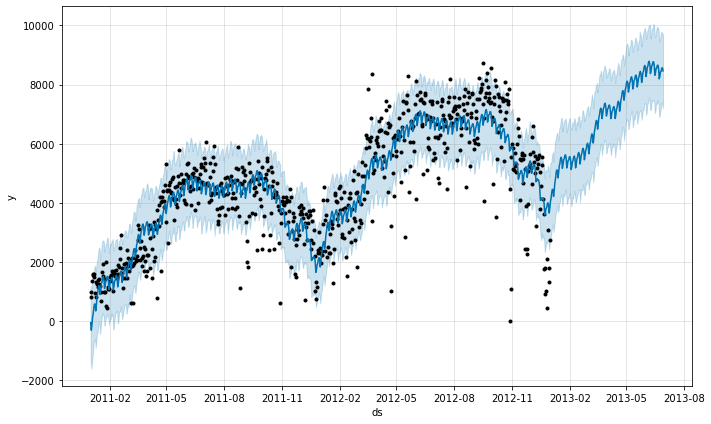

In [14]:
fig1 = prophet.plot(forecast)

**[3.8]** Plot the components of this model with `plot_components()`



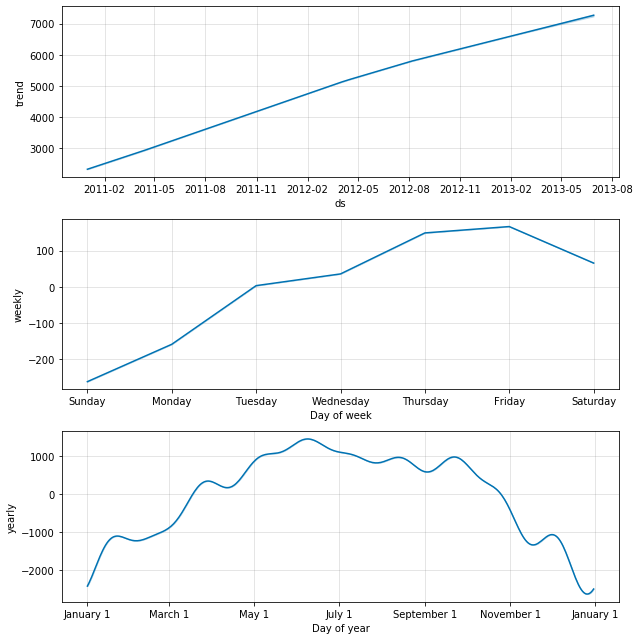

In [15]:
fig2 = prophet.plot_components(forecast)

**[3.9]** Import cross_validation from fbprophet.diagnostics

In [16]:
# Solution
from fbprophet.diagnostics import cross_validation

**[3.10]** Perform cross-validation with initial data of the first year (inital=365), forecast on future 7 days (horizon='7 days') and sliding window of 7 days (period='7 days')


In [17]:
cv_results = cross_validation(prophet, initial='365 days', period='7 days', horizon='7 days')

INFO:fbprophet:Making 52 forecasts with cutoffs between 2012-01-02 00:00:00 and 2012-12-24 00:00:00


**[3.11]** Import performance_metrics from fbprophet.diagnostics

In [18]:
# Solution
from fbprophet.diagnostics import performance_metrics

**[3.12]** Calculate performance metrics on the cross validation

In [19]:
metrics_results = performance_metrics(cv_results)

**[3.13]** Import plot_cross_validation_metric from fbprophet.plot

In [20]:
# Solution
from fbprophet.plot import plot_cross_validation_metric

**[3.14]** Plot the RMSE score with `plot_cross_validation_metric()` on the cross validation results

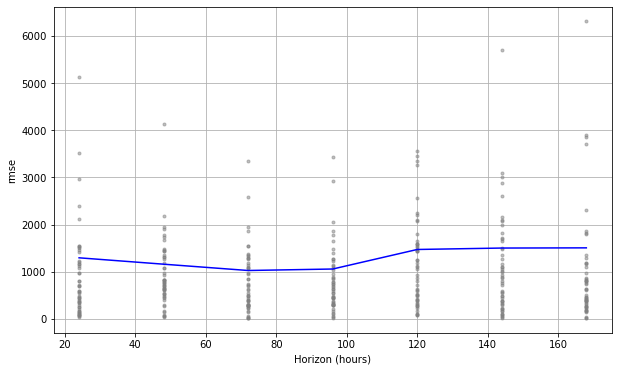

In [21]:
fig3 = plot_cross_validation_metric(cv_results, metric='rmse')

### 4. Train Prophet model with holidays

**[4.1]** Instantiate the Prophet class into a variable called prophet1

In [22]:
# Solution
prophet1 = Prophet()

**[4.2]** Add the US holidays component to the model

In [23]:
prophet1.add_country_holidays(country_name='US')

**[4.3]** Fit the model with the prepared data

In [24]:
# Solution
prophet1.fit(prophet_df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


**[4.4]** Save the fitted model into the folder `models` as a file called `prophet_holiday.joblib`

In [25]:
dump(prophet1,  '../models/prophet_holiday.joblib')

['../models/prophet_holiday.joblib']

**[4.5]** Forecast the future dates with predict() and save the results in a variable called forecast1

In [26]:
# Solution:
forecast1 = prophet1.predict(future)

**[4.5]** Print the components of this model on the predictions

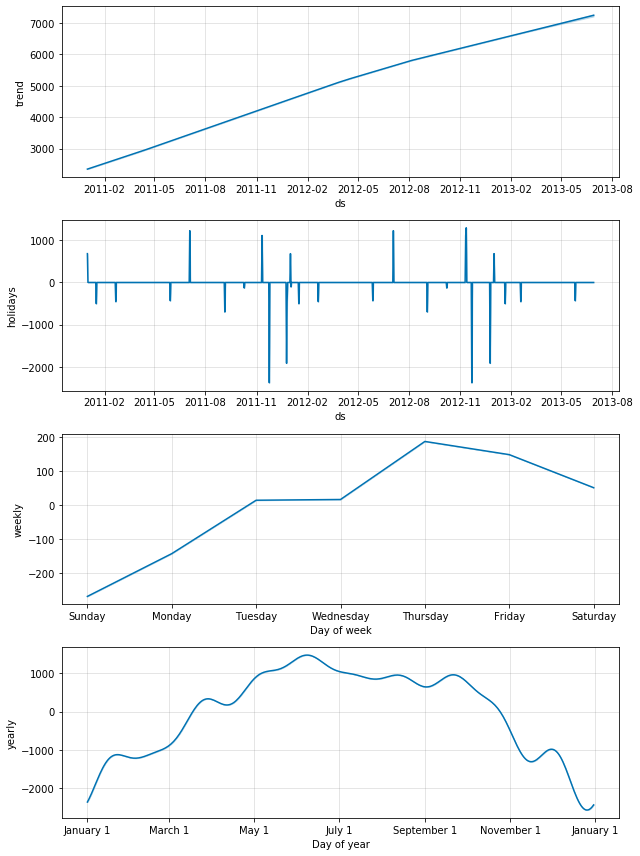

In [27]:
# Solution:
fig1 = prophet1.plot_components(forecast1)

**[4.6]** Perform cross-validation with initial data of the first year (inital=365), forecast on future 7 days (horizon='7 days') and sliding window of 7 days (period='7 days')

In [28]:
# Solution:
cv_results1 = cross_validation(prophet1, initial='365 days', period='7 days', horizon='7 days')

INFO:fbprophet:Making 52 forecasts with cutoffs between 2012-01-02 00:00:00 and 2012-12-24 00:00:00


**[4.7]** Plot the RMSE score with `plot_cross_validation_metric()` on the cross validation results

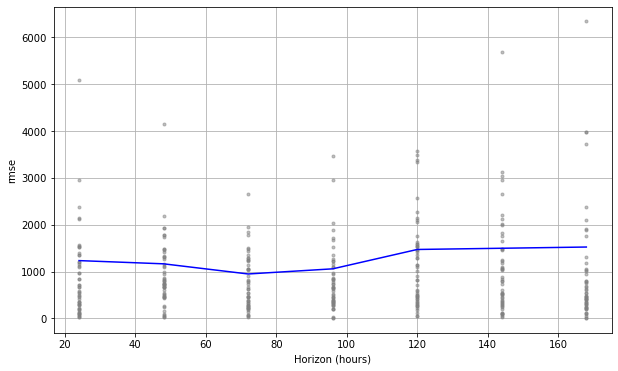

In [29]:
# Solution:
fig2 = plot_cross_validation_metric(cv_results1, metric='rmse')

### 5. Train Prophet model with monthly seasonality

**[5.1]** Instantiate the Prophet class into a variable called prophet2 and add the US holidays component to the model

In [30]:
# Solution
prophet2 = Prophet()
prophet2.add_country_holidays(country_name='US')

**[5.2]** Add a monthly seasonal component to the model with period=30.5 and fourier_order=5

In [31]:
prophet2.add_seasonality(name='monthly', period=30.5, fourier_order=5)

**[5.3]** Fit the model with the prepared data

In [32]:
# Solution
prophet2.fit(prophet_df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


**[5.4]** Save the fitted model into the folder `models` as a file called `prophet_month.joblib`

In [33]:
dump(prophet2,  '../models/prophet_month.joblib')

['../models/prophet_month.joblib']

**[5.5]** Forecast the future dates with predict() and save the results in a variable called forecast2

In [34]:
# Solution:
forecast2 = prophet2.predict(future)

**[5.6]** Print the components of this model on the predictions

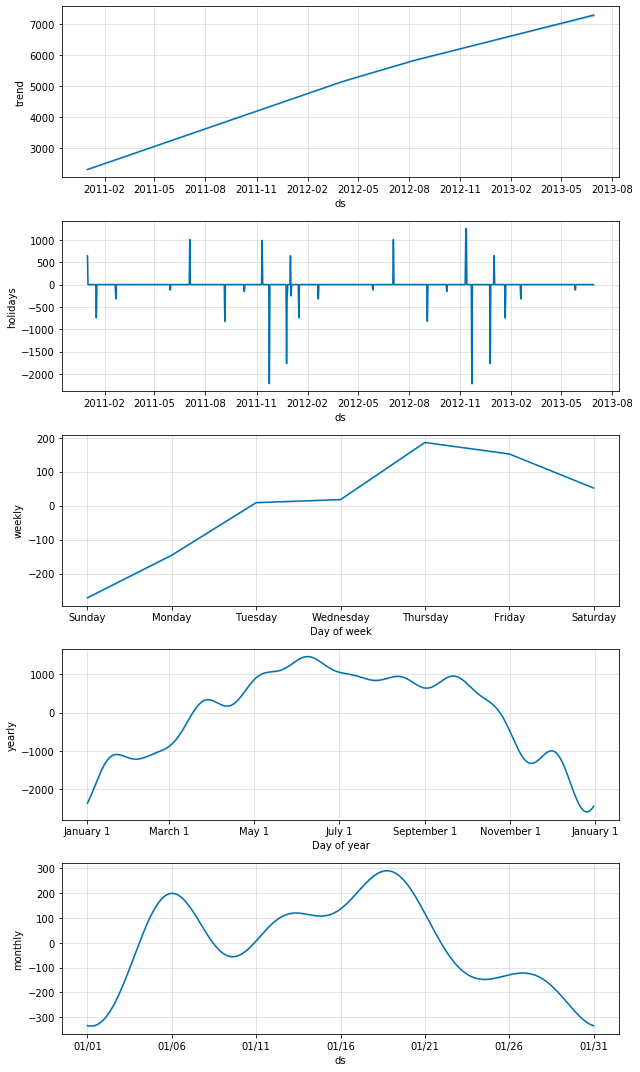

In [35]:
# Solution:
fig1 = prophet2.plot_components(forecast2)

**[5.7]** Perform cross-validation with initial data of the first year (inital=365), forecast on future 7 days (horizon='7 days') and sliding window of 7 days (period='7 days')

In [36]:
# Solution:
cv_results2 = cross_validation(prophet2, initial='365 days', period='7 days', horizon='7 days')

INFO:fbprophet:Making 52 forecasts with cutoffs between 2012-01-02 00:00:00 and 2012-12-24 00:00:00


**[5.8]** Plot the RMSE score with `plot_cross_validation_metric()` on the cross validation results

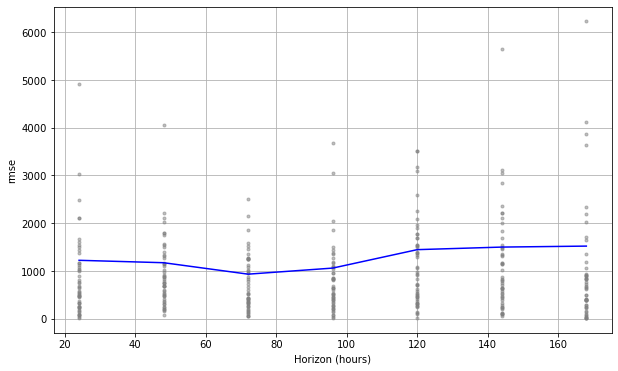

In [37]:
# Solution:
fig2 = plot_cross_validation_metric(cv_results2, metric='rmse')